## Project Overview

This project will study the evolution of the measures of economic activity, namely unemployment and mean income, alongside the growth of state minimum wage within the past 30 years. Many economists theorize that if the increase in minimum wage is over the natural wage of a market it may lead to a decrease in the number of jobs available and may also lead to an increase in the costs of living. The project will analyze the relationships among California minimum wage, unemployment rate, and mean real wage (adjusted by costs of living) in Los Angeles County. We will be using a linear regression analysis to test the relationships between these variables.

## Project Structure:
The project will start by providing a data report. The data report will explain where the data comes from and how to access the data.

The second part of the project will provide summary statistics about California minimum wage, the unemployment rate trends, and mean real wage  and provide visualizations of these statistics to help further illustrate the project.

The third part of the project will state a hypothesis and compared with trends in previous scholarship. Then, a linear regression will be performed to test the hypothesis and the results will be stated. Lastly, there will be a detailed discussion of the results and how it follows or goes against previous scholarship.

## Data Report

The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides yearly data on California minimum wage, monthly data on California unemployment rate, and yearly data on mean real wages in SF and LA county. The data can be accessed at https://fred.stlouisfed.org.


## Key Variables
The 3 key variables in this project are minimum wage, unemployment rate and mean real wages. FRED defines minimum wage as “The federal minimum wage is the minimum hourly wage employers are required to pay employees who are eligible under the Fair Labor Standards Act (FLSA) of 1938. The FLSA was generally only applicable to employees involved in interstate commerce, either directly or through the creation of goods. Many amendments have since been added to the FLSA, expanding its coverage and raising the minimum wage. Significant amendments occurred in 1961 and in 1966, when a separate minimum wage for farm workers was established. Starting in January of 1978 the minimum wages of all eligible workers, including farm workers, were made uniform. The values in the series for non-farm workers are those for the groups initially covered under the 1938 FLSA. Many states also have minimum wage laws. Some state laws provide greater employee protections; employers must comply with both.”

The Employment Development Department (EDD) defines unemployment rate in California as “All civilians 16 years and over who did not work during the survey week, who made specific efforts to find a job within the past four weeks, and who were available to work. The unemployment rate is derived by dividing the number of unemployed by the labor force. The result is expressed as a percentage.”

FRED defines mean real wages as “Mean household wages in real U.S. Dollars from the American Community Survey 1-year estimates adjusted for cost of living using regional price parities (RPP) from the U.S. Bureau of Economic Analysis' Real Personal Income for States and Metropolitan Areas.”

In [1]:
# Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
# Access Data
url = 'https://fred.stlouisfed.org/series/STTMINWGCA/downloaddata/STTMINWGCA.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1968-01-01,1.65
1,1969-01-01,1.65
2,1970-01-01,1.65
3,1971-01-01,1.65
4,1972-01-01,1.65


In [3]:
data.columns=['DATE','MINWAGE']
data.head()

,DATE,MINWAGE
0,1968-01-01,1.65
1,1969-01-01,1.65
2,1970-01-01,1.65
3,1971-01-01,1.65
4,1972-01-01,1.65


In [4]:
#Summary Statistics for California State Minimum Wage Rate
data.describe()

,MINWAGE
count,53.000000
mean,5.166038
std,2.954084
min,1.650000
25%,3.350000
50%,4.250000
75%,7.500000
max,12.000000


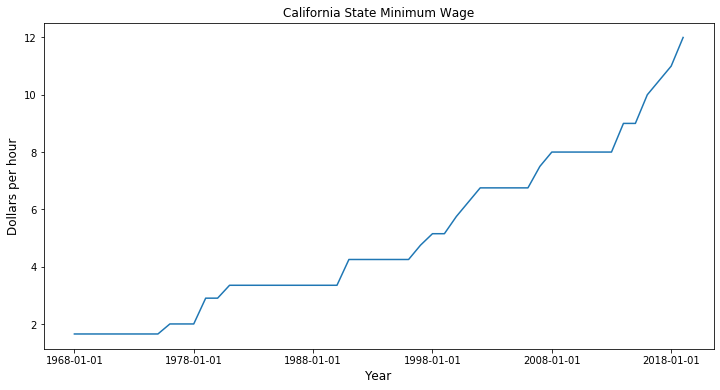

In [5]:
# Graphing the California State Minimum Wage Rate
data1=data.set_index('DATE')
ax = data1['1968':'2020'].plot(title='California State Minimum Wage', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Dollars per hour', fontsize=12)
plt.show()

In [6]:
#Access Data
url_u = 'https://fred.stlouisfed.org/series/CALOSA7URN/downloaddata/CALOSA7URN.csv'
data_u = pd.read_csv(url_u, parse_dates=True)
data_u.head()

,DATE,VALUE
0,1990-01-01,6.0
1,1990-02-01,5.7
2,1990-03-01,5.4
3,1990-04-01,5.6
4,1990-05-01,5.5


In [7]:
data_u.columns=['DATE', 'CA U RATE']
data_u.head()

,DATE,CA U RATE
0,1990-01-01,6.0
1,1990-02-01,5.7
2,1990-03-01,5.4
3,1990-04-01,5.6
4,1990-05-01,5.5


In [8]:
# Summary Statistics for Los Angeles Unemployment Rate
data_u.describe()

,CA U RATE
count,369.000000
mean,7.611382
std,2.760638
min,4.000000
25%,5.400000
50%,6.800000
75%,9.400000
max,20.800000


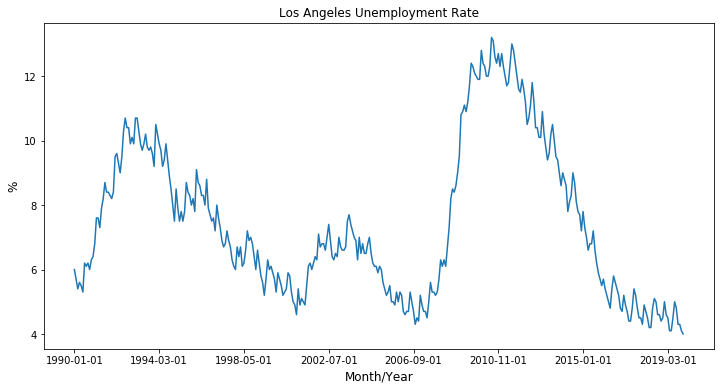

In [9]:
# Graphing LA Unemployment Rate
data_u1=data_u.set_index('DATE')
ax = data_u1['1990':'2020'].plot(title='Los Angeles Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('Month/Year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [10]:
# Access Data
url_r = 'https://fred.stlouisfed.org/series/MWACL06037/downloaddata/MWACL06037.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.head()

,DATE,VALUE
0,2009-01-01,24.86
1,2010-01-01,16.42
2,2011-01-01,15.76
3,2012-01-01,15.76
4,2013-01-01,16.00


In [11]:
data_r.columns=['DATE', 'REAL MEAN WAGE']
data_r.head()

,DATE,REAL MEAN WAGE
0,2009-01-01,24.86
1,2010-01-01,16.42
2,2011-01-01,15.76
3,2012-01-01,15.76
4,2013-01-01,16.00


In [12]:
# Summary Statistics for LA Real Mean Wage
data_r.describe()

,REAL MEAN WAGE
count,10.000000
mean,20.120000
std,5.068116
min,15.760000
25%,16.072500
50%,16.790000
75%,25.325000
max,27.150000


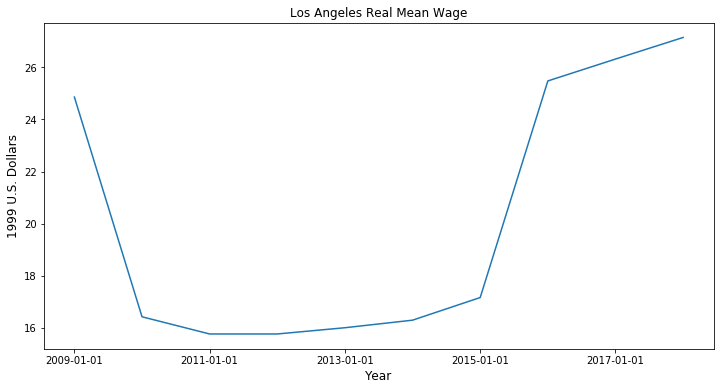

In [13]:
# Graphing Los Angeles Real Mean Wage
data_r1=data_r.set_index('DATE')
ax = data_r1['2009':'2020'].plot(title='Los Angeles Real Mean Wage', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('1999 U.S. Dollars', fontsize=12)
plt.show()